In [17]:
!pip install gensim

zsh:1: /Users/liuyifan/github/historical-text-embedding/PyWS/bin/pip: bad interpreter: /Users/liuyifan/Desktop/work-study/PyWS/bin/python3.10: no such file or directory


## Load Model / Words

In [1]:
import os
from gensim.models import KeyedVectors

In [2]:
# load target words
target_words = []
with open("../../data/vocab.txt") as f:
    for line in f:
        target_words.append(line.strip())

print(target_words[:10])

['hic', 'andree', 'honorifice', 'inde', 'suorum', 'presenti', 'sancti', 'ista', 'partem', 'uoluerit']


In [3]:
# base_path = "../../model/base_model"
test_path = "../../model/test_model"

In [20]:
# eng_base_paths = dict()
# for i in range(1, 3):
#     model_name = f"pretrained-bert-rand{i}"
#     model_path = os.path.join(base_path, f"engrandom{i}_pretrained-bert-20.vec")
#     eng_base_paths[model_name] = model_path

# ang_base_paths = dict()
# for i in range(1, 51):
#     model_name = f"pretrained-bert-rand{i}"
#     model_path = os.path.join(base_path, f"angrandom{i}_pretrained-bert-20.vec")
#     ang_base_paths[model_name] = model_path

# eng_base_models = {name: KeyedVectors.load_word2vec_format(path, binary=False) for name, path in eng_base_paths.items()}
# ang_base_models = {name: KeyedVectors.load_word2vec_format(path, binary=False) for name, path in ang_base_paths.items()}

In [4]:
eng_paths = {
    "finetuned-bert-dbamman-4": os.path.join(test_path, "engtext_fine-tuned-bert-dbamman-4.vec"),
    "finetuned-bert-dbamman-10": os.path.join(test_path, "engtext_fine-tuned-bert-dbamman-10.vec"),
    "finetuned-bert-dbamman-20": os.path.join(test_path, "engtext_fine-tuned-bert-dbamman-20.vec"),
    "finetuned-bert-vasquez-4": os.path.join(test_path, "engtext_fine-tuned-bert-vasquez-4.vec"),
    "finetuned-bert-vasquez-10": os.path.join(test_path, "engtext_fine-tuned-bert-vasquez-10.vec"),
    "finetuned-bert-vasquez-20": os.path.join(test_path, "engtext_fine-tuned-bert-vasquez-20.vec"),
    "pretrained-bert-10": os.path.join(test_path, "engtext_pretrained-bert-10.vec"),
    "pretrained-bert-20": os.path.join(test_path, "engtext_pretrained-bert-20.vec"),
    "pretrained-bert-small-10": os.path.join(test_path, "engtext_pretrained-bert-small-10.vec"),
    "pretrained-bert-small-20": os.path.join(test_path, "engtext_pretrained-bert-small-20.vec"),
    # "internal-fasttext-100": os.path.join(dir_path, "model/static/adapt_100/eng_adapt_100.vec"),
    # "internal-fasttext-300": os.path.join(dir_path, "model/static/adapt_300/eng_adapt_300.vec"),
    # "external-fasttext-100": os.path.join(dir_path, "model/static/157_100/eng_157_100.vec"),
    # "external-fasttext-300": os.path.join(dir_path, "model/static/157_300/eng_157_300.vec")
}

ang_paths = {
    "finetuned-bert-dbamman-4": os.path.join(test_path, "angtext_fine-tuned-bert-dbamman-4.vec"),      
    "finetuned-bert-dbamman-10": os.path.join(test_path, "angtext_fine-tuned-bert-dbamman-10.vec"),      
    "finetuned-bert-dbamman-20": os.path.join(test_path, "angtext_fine-tuned-bert-dbamman-20.vec"), 
    "finetuned-bert-vasquez-4": os.path.join(test_path, "angtext_fine-tuned-bert-vasquez-4.vec"),
    "finetuned-bert-vasquez-10": os.path.join(test_path, "angtext_fine-tuned-bert-vasquez-10.vec"),
    "finetuned-bert-vasquez-20": os.path.join(test_path, "angtext_fine-tuned-bert-vasquez-20.vec"),    
    "pretrained-bert-10": os.path.join(test_path, "angtext_pretrained-bert-10.vec"),
    "pretrained-bert-20": os.path.join(test_path, "angtext_pretrained-bert-20.vec"),
    "pretrained-bert-small-10": os.path.join(test_path, "angtext_pretrained-bert-small-20.vec"),
    "pretrained-bert-small-20": os.path.join(test_path, "angtext_pretrained-bert-small-20.vec"),
    # "internal-fasttext-100": os.path.join(dir_path, "model/static/adapt_100/ang_adapt_100.vec"),
    # "internal-fasttext-300": os.path.join(dir_path, "model/static/adapt_300/ang_adapt_300.vec"),
    # "external-fasttext-100": os.path.join(dir_path, "model/static/157_100/ang_157_100.vec"),
    # "external-fasttext-300": os.path.join(dir_path, "model/static/157_300/ang_157_300.vec")
}
eng_models = {name: KeyedVectors.load_word2vec_format(path, binary=False) for name, path in eng_paths.items()}
ang_models = {name: KeyedVectors.load_word2vec_format(path, binary=False) for name, path in ang_paths.items()}

## Intrinsic Eval

In [12]:
import numpy as np

def calculate_cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

# calculate similarities for a given word across all target words in a model dictionary
def calculate_similarities(models, target_words):
    similarities = {}
    for model_name, model in models.items():
        model_similarities = {}
        for word in target_words:
            word_similarities = {}
            for other in target_words:
                if other != word:
                    word_similarities[other] = (model.similarity(word, other))
                else:
                    word_similarities[word] = 1
            model_similarities[word] = word_similarities
        similarities[model_name] = model_similarities
    return similarities

# Calculate similarities for English models
eng_similarities = calculate_similarities(eng_models, target_words)
# Calculate similarities for Anglo models
ang_similarities = calculate_similarities(ang_models, target_words)

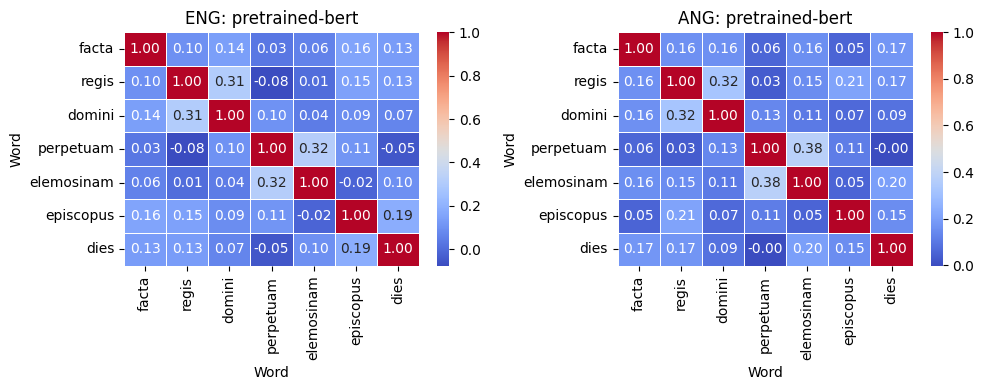

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors

# Assume the models and paths are loaded as shown previously
# Assume calculate_similarities function is defined as shown previously

# Function to create a DataFrame from similarities dictionary
def similarities_to_dataframe(similarities):
    dataframes = {}
    for model_name, model_data in similarities.items():
        df = pd.DataFrame(model_data).fillna(0)  # Fill NaN with 0 for missing word comparisons
        dataframes[model_name] = df
    return dataframes

# Function to plot all heatmaps in a single figure
def plot_compact_heatmaps(eng_dfs, ang_dfs):
    num_models = len(eng_dfs) + len(ang_dfs)
    cols = 3  # Number of columns in the subplot grid
    rows = (num_models + cols - 1) // cols  # Calculate rows needed

    plt.figure(figsize=(cols * 5, rows * 4))  # Adjust overall figure size

    # Plotting English models
    for i, (model_name, df) in enumerate(eng_dfs.items(), 1):
        plt.subplot(rows, cols, i)
        sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title(f"ENG: {model_name}")
        plt.xlabel("Word")
        plt.ylabel("Word")

    # Plotting Anglo-Saxon models
    for j, (model_name, df) in enumerate(ang_dfs.items(), len(eng_dfs) + 1):
        plt.subplot(rows, cols, j)
        sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title(f"ANG: {model_name}")
        plt.xlabel("Word")
        plt.ylabel("Word")

    plt.tight_layout()  # Adjust subplots to fit into the figure area
    plt.show()

# Calculate similarities for each model group
eng_similarities = calculate_similarities(eng_models, target_words)
ang_similarities = calculate_similarities(ang_models, target_words)

# Convert to DataFrame
eng_dfs = similarities_to_dataframe(eng_similarities)
ang_dfs = similarities_to_dataframe(ang_similarities)

# Generate compact heatmaps
plot_compact_heatmaps(eng_dfs, ang_dfs)


## Semantic Change

In [5]:
import numpy as np

def calculate_cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

def semantic_change(eng_model, ang_model, word):
    eng_vector = eng_model[word]
    ang_vector = ang_model[word]
    similarity = calculate_cosine_similarity(eng_vector, ang_vector)
    return similarity

In [ ]:
# # base model
# base_similarities = {}
# for word in target_words:
#     base_similarities[word] = []
#     for name in eng_base_models.keys():
#         similarity = semantic_change(eng_base_models[name], ang_base_models[name], word)
#         base_similarities[word].append(similarity)

In [22]:
# output_file_path = "../../output/base_model_new.txt"
# with open(output_file_path, "w") as f:
#     for word, value_lst in base_similarities.items():
#         value_array = np.array(value_lst)
#         mean = np.mean(value_array)
#         std = np.std(value_array, ddof=1)
#         f.write(f"{word}: mean: {mean: .4f}, std: {std: .4f}\n")

In [7]:
similarities = dict()
for word in target_words:
    similarities[word] = dict()
    for name in eng_models.keys():
        print(name)
        similarity = semantic_change(eng_models[name], ang_models[name], word)
        similarities[word][name] = similarity

finetuned-bert-dbamman-4
finetuned-bert-dbamman-10
finetuned-bert-dbamman-20
finetuned-bert-vasquez-4
finetuned-bert-vasquez-10
finetuned-bert-vasquez-20
pretrained-bert-10


ValueError: shapes (300,) and (768,) not aligned: 300 (dim 0) != 768 (dim 0)

In [13]:
eng_models["pretrained-bert-10"].vector_size

768

In [55]:
# Assume cosine_similarities is the data structure with the cosine similarities
sort_by = "pretrained-bert-20"

# Sort the words based on the cosine similarity values of the specified model
sorted_words = sorted(
    cosine_similarities.items(),
    key=lambda item: item[1].get(sort_by, float('inf'))
)

# Write the sorted words to a file
output_file_path = "../../output/semantic_change.txt"
with open(output_file_path, 'w') as f:
    for word, similarities in sorted_words:
        similarities_str = ", ".join(f"{model}: {similarity:.4f}" for model, similarity in similarities.items())
        f.write(f"{word}: {similarities_str}\n")

In [ ]:
# TODO: add the z-test here.

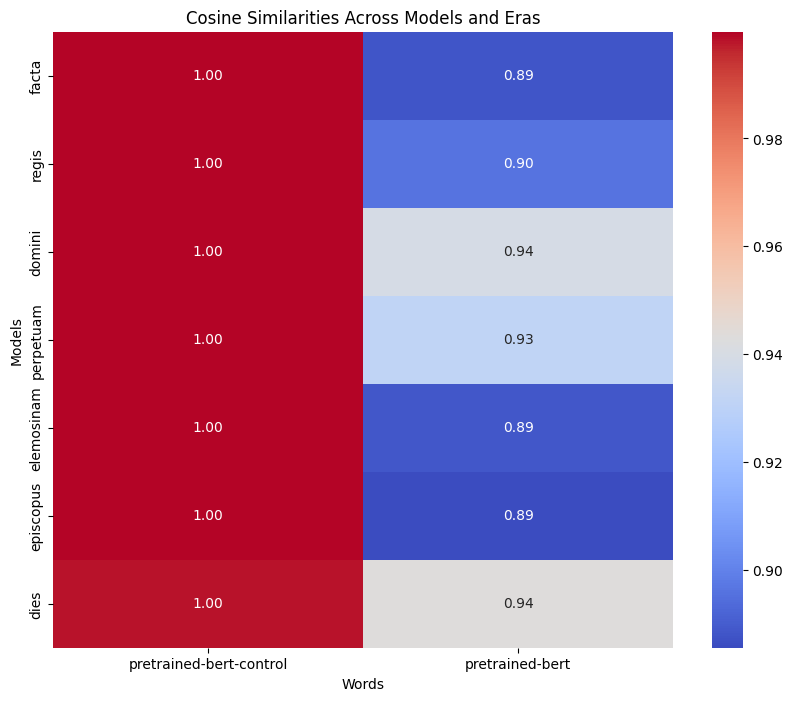

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the cosine_similarities dictionary to a DataFrame
df_cosine_similarities = pd.DataFrame(cosine_similarities).T

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(df_cosine_similarities, annot=True, fmt=".2f", cmap='coolwarm')

# Add labels and a title if desired
plt.title('Cosine Similarities Across Models and Eras')
plt.xlabel('Words')
plt.ylabel('Models')

# Show the plot
plt.show()

In [ ]:
def least_similar(c1, c2):
    rslt = []
    for word in c1.key_to_index:
        if word in c2.key_to_index:
          embedding1 = c1[word]
          embedding2 = c2[word]
          cosine_similarity = np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))
          rslt.append((cosine_similarity, word))
    rslt.sort()

    return rslt